In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
def pi_guassian(beta):
    ratio = 0.01
    exponent = -2*(beta**2)*ratio**2/(np.sqrt(1+2*beta))
    res = np.sqrt(1+2*beta)*np.exp(exponent)
    return res

In [3]:
def pi_exponent(beta):
    ratio = 0.01
    exponent = -2*(beta)*ratio/(np.sqrt(1+2*beta))
    res = np.sqrt(1+2*beta)*np.exp(exponent)
    return res

In [61]:
def ratio_guassian(beta):
    M = 100
    R = 20
    return 1/(np.power(R, 1/M)*(pi_guassian(beta)-1)+1)
def ratio_exponent(beta):
    M = 100
    R = 20
    return 1/(np.power(R, 1/M)*(pi_exponent(beta)-1)+1)

In [32]:
beta_data = [-0.001, -0.01, -0.1, 0, 0.001, 0.01,]


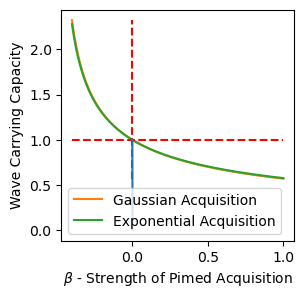

In [59]:
beta_range = np.linspace(-0.4, 1, 100)
plt.figure(figsize = [3, 3])
Y1 = ratio_guassian(beta_range)
Y2 = ratio_exponent(beta_range)
plt.errorbar([0, 0.001], [1, 0], [0.01, 0])
plt.plot(beta_range, Y1, label = "Gaussian Acquisition")
plt.xlabel(r"$\beta$ - Strength of Pimed Acquisition")
plt.ylabel("Wave Carrying Capacity")
plt.plot(beta_range, Y2, label = "Exponential Acquisition")
plt.plot(beta_range, np.ones_like(beta_range), linestyle = "--", color = "red")
plt.vlines(0, min(Y1), max(Y1), linestyle = "--", color = "red")
plt.legend()

In [17]:
params = { #parameters relevant for the equations
    "Nh":             1E8,
    "N0":             1E7, #This Will be updated by self-consitent solution
    "R0":              20, 
    "M":               10, #Also L, total number of spacers
    "mu":             0.1, #mutation rate
    "gamma_shape":     20, 
    "Np":               0, #Number of Cas Protein
    "dc":               3, #Required number of complexes to activate defence
    "h":                4, #coordination coeff
    "r":             2000, #cross-reactivity kernel
    "beta":         0.000,
}
sim_params = {"dx": 1,}

In [18]:
%run ../Scripts/formulas.py
%run ../Scripts/initMethods.py

In [54]:
params, sim_params = init_cond(params, sim_params, out_print=True)

Phage Population: 23190.0000| Uc: 24.0389| sigma: 8.7198
Phage Population: 23190.1106| Uc: 24.0389| sigma: 8.7198


In [57]:
var = calculate_var(params["N"], params, sim_params)

In [72]:
def population_increase(beta, params, sim_params):
    R = params["R0"]
    M = params["M"]
    return 1/(np.power(R, 1/M)*(pi_guassian(beta)-1)+1)

beta_data = np.linspace(-0.4, 1, 100)
population_range = [params["N"]*population_increase(beta, params, sim_params) for beta in beta_data]
var_range = [calculate_var(N, params, sim_params) for N in population_range]
vel_range = [calculate_velocity(N, params, sim_params) for N in population_range]

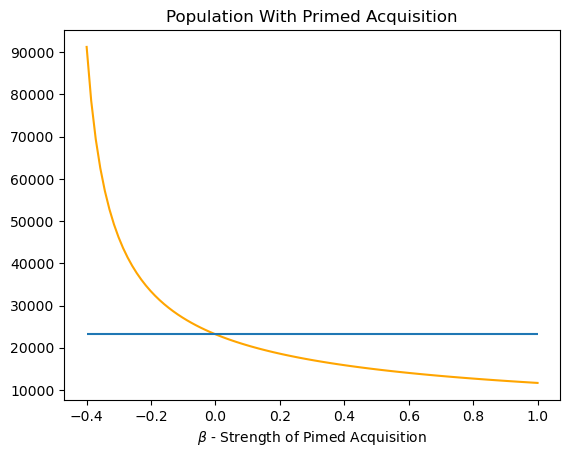

In [73]:
plt.figure()
plt.plot(beta_data, population_range, color = "orange")
plt.hlines(params["N"], beta_data[0], beta_data[-1])
plt.title("Population With Primed Acquisition")
plt.xlabel(r"$\beta$ - Strength of Pimed Acquisition")
plt.show()


In [74]:
sim_params

{'dx': 1,
 'initial_var_n': 8.71975226715209,
 'initial_var_nh': 25.57152144570258}

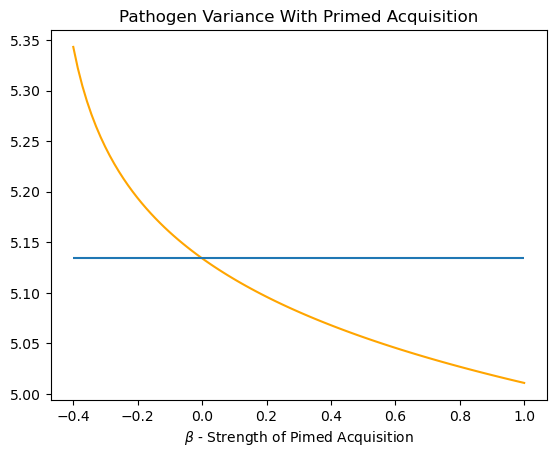

In [77]:
plt.figure()
plt.plot(beta_data, var_range, color = "orange")
plt.hlines(var, beta_data[0], beta_data[-1])
plt.title("Pathogen Variance With Primed Acquisition")
plt.xlabel(r"$\beta$ - Strength of Pimed Acquisition")
plt.show()

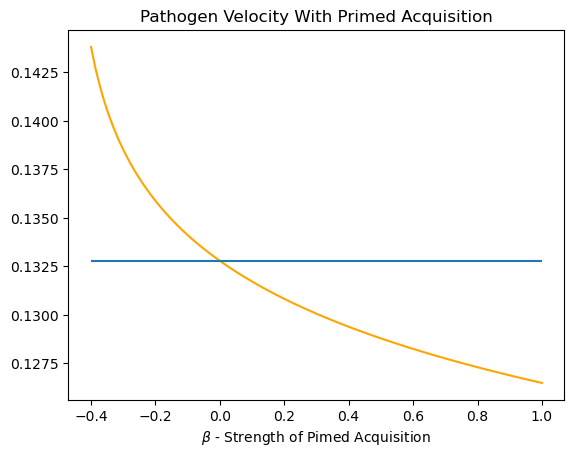

In [78]:
plt.figure()
plt.plot(beta_data, vel_range, color = "orange")
plt.hlines(params["v0"], beta_data[0], beta_data[-1])
plt.title("Pathogen Velocity With Primed Acquisition")
plt.xlabel(r"$\beta$ - Strength of Pimed Acquisition")
plt.show()